<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">M1.871 · Privacidad</p>
    <p style="margin: 0; text-align:right;">Máster Universitario en Ciberseguridad y Privacidad</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Práctica 1

--- 

Para resolver esta práctica, tenéis que poner las soluciones en el mismo
*notebook*, en las celdas de código que están en blanco habilitadas para ello.
Después de cada celda de código podéis poner una celda *markdown* en donde
podéis poner la justificación de la respuesta dada en la solución. No es
obligatorio, pero sí muy recomendable que justifiquéis las respuestas que
dais, ya que eso facilita la corrección en caso de una respuesta incorrecta
(pudiendo valorar el planteamiento), y puede ayudar a descartar posibles
sospechas sobre copias.

En muchos casos, cuando se pide implementar una función, se proporciona el
nombre de la función y los parámetros, indicado como ayuda el tipo de dichos
parámetros y el tipo que retorna la función en forma de *type hint*. Es necesario
que respetéis el nombre de la función y en la medida de los posibles los tipos.
Sin embargo podéis implementar el código de la función con total libertad. Podéis
definir otras funciones y no respetar del todo los *type hints* si así lo consideráis
oportuno. Dicha indicación sobre la definición de la función aparece comentada
para evitar errores de compilación.

Este notebook va acompañado de un cuestionario online con preguntas sobre los
ejercicios. Este cuestionario debe ser contestado antes de la fecha de entrega
de la práctica. Se recomienda que afrontéis el cuestionario una vez finalizada
la practica, habiendo realizado y entendido todos los ejercicios. En muchos
casos se proporcionan datos o posibles resultados con el objeto de ayudar a
poder contestar el cuestionario aunque no se haya acabado o no se haya sabido
implementar todos los ejercicios de este *notebook*.



## Publicación de microdatos

Disponemos de datos sobre la actividad económica de diversas empresas de Taiwan.
Los datos se utilizan para predecir la bancarrota de empresas y es un
subconjunto obtenido del repositorio [UCI Machine Learning
Repository](https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction).

Supondremos que los datos no han sido previamente anonimizados y procederemos
a aplicar diversos métodos de protección con el objetivo de preservar la
privacidad de las empresas que aparecen en el estudio. Hemos limitado el
conjunto de datos a los siguientes atributos:
- `' ROA(C) before interest and depreciation before interest'`
- `' ROA(B) before interest and depreciation after tax'`
- `' Operating Gross Margin'`
- `' Research and development expense rate'`

Todos ellos son de tipo numérico (real).

Podemos leer el fichero CSV, que se encuentra en `data/company.csv`, como un
`DataFrame` de *pandas* que podemos guardar en la variable `df_compay`. 


In [2]:
from typing import Dict, List

import numpy as np
import pandas as pd
import seaborn as sns

df_company = pd.read_csv("data/company.csv")
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 4 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 2    Operating Gross Margin                                   6819 non-null   float64
 3    Research and development expense rate                    6819 non-null   float64
dtypes: float64(4)
memory usage: 213.2 KB


## Anonimización con ruido

Para poder empezar a trabajar con el conjunto de datos haremos una primera
anonimización utilizando ruido aditivo de forma muy sencilla.

**Ejercicio 1** [10%]

Añadir ruido aditivo a cada una de las 4 variables utilizando una distribución normal
$N(\mu, \sigma^2)$ con $\mu = 0$ y como varianza tomaremos $\sigma^2 = p \sigma_o^2$
donde $\sigma_o^2$ es la varianza de la variable que queremos proteger.

Desarrollad una función `noise_add_normal(df, p)` que recibe como parámetro `df` el
DataFrame a anonimizar y el parámetro `p`, y retorna una copia del DataFrame protegido.
Recordad que:
- cada variable (columna) tendrá una distribución de ruido independiente.
- la función no puede modificar el DataFrame original.

Finalmente, generad un DataFrame `df_noise_a` como la version protegida de
`df_company`, con el parámetro $p=0.1$.

*Nota*: funciones que os pueden ser de utilidad:
- `numpy.random.Generator.normal`

In [5]:
def noise_add_normal(df: pd.DataFrame, p: float) -> pd.DataFrame:
    df_protected = df.copy()
    for _ in df.columns:
        df_protected[_] = df[_] + np.random.default_rng().normal(0.0, df[_].std() * np.sqrt(p), df[_].size)
    return(df_protected)

**Justificación**: 
En este caso se hace un bucle que recorriendo toda la matriz y se le suma la desviación estándar multiplicada por la raíz de p. Mediante random.default_rng().normal se aleatoriza cada uno de los valores de distribución de ruido.

**Ejercicio 2** [10%]

En este caso vamos a implementar ruido multiplicativo utilizando también una
distribución normal. En este caso utilizamos una distribución normal 
$N(\mu, \sigma^2)$ donde $\mu = 1$ y $\sigma^2 = p \sigma^2_o$ donde 
$\sigma^2_o$ es la varianza de la variable original y $p$ un parámetro que 
determina la cantidad de ruido.

Implementa una función `noise_mul_normal(df, p)` que recibe como parámetro
`df` el DataFrame a anonimizar y el parámetro `p`, y retorna una copia del
DataFrame protegido. Al igual que en el caso aditivo, recordad que:
- cada variable (columna) tendrá una distribución de ruido independiente.
- la función no puede modificar el DataFrame original.

Finalmente, generad una version protegida de los datos con el parámetro
$p=0.1$ y la guardadla en la variable `df_noise_m`.


In [6]:
def noise_mul_normal(df: pd.DataFrame, p: float) -> pd.DataFrame:
    df_protected = df.copy()
    for _ in df.columns:
        df_protected[_] = df[_] * np.random.default_rng().normal(0.0, df[_].std() * np.sqrt(p), df[_].size)
    return(df_protected)
        
# En esta ocasión se aplica la misma mecánica del punto anterior, pero multiplicando.
# El resto de valores provienen de los mismo cálculos que antes.

## Medidas de pérdida de información

**Ejercicio 3** [20%]

En este ejercicio desarrollaremos diversas medidas de pérdida de información.
Para ello vamos a utilizar la siguiente notación:
- $X$: conjunto de datos original. Lo podemos interpretar como una matriz de
tamaño $n \times d$ donde $n$ es el número de registros (filas) y $d$ el
número de variables (columnas).
- $X'$: conjunto de datos protegido, también $n \times d$.
- $R$: matriz de correlación de los datos originales $X$. Esta matriz es una
matriz $d \times d$ donde el elemento $(i,j)$ es la correlación entre la
variable $V_i$ y $V_j$. Como medida de correlación tomaremos el coeficiente de
correlación de Pearson.
- $R'$: matriz de correlación de los datos protegidos $X'$.

En cada caso mediremos la media del error absoluto MAE (*mean absolute error*)
y la media del error relativo MRE (*mean relative error*). Es decir:
- Sobre $X$, $X'$:
  - *MAE*: $\frac{1}{nd}\sum_{j=1}^d \sum_{i=1}^n \mid x_{ij} - x'_{ij} \mid$
  - *MRE*: $\frac{1}{nd}\sum_{j=1}^d \sum_{i=1}^n \frac{\mid x_{ij} - x'_{ij} \mid}{\mid x_{ij}\mid}$
- Sobre $R$, $R'$:
  - *MAE*: $\frac{1}{d^2}\sum_{j=1}^d \sum_{i=1}^n \mid r_{ij} - r'_{ij} \mid$
  - *MRE*: $\frac{1}{d^2}\sum_{j=1}^d \sum_{i=1}^n \frac{\mid r_{ij} - r'_{ij} \mid}{\mid r_{ij}\mid}$

Se pide la implementación de la función
`information_loss(df_original, df_protected)` donde `df_original` es el
DataFrame con los datos originales ($X$) y `df_protected` el DataFrame con los
datos protegidos ($X'$). La función tiene que retornar un diccionario de
Python con los siguientes campos:
- `'data-mae'`: valor del MAE sobre $X$ y $X'$
- `'data-mre'`: valor del MRE sobre $X$ y $X'$
- `'corr-mae'`: valor del MAE sobre $R$ y $R'$
- `'corr-mre'`: valor del MRE sobre $R$ y $R'$

Por ejemplo,

```
{
  'data-mae': 52604277.58657338,
  'data-mre': 0.003232,
  'corr-mae': 0.0023844305276822485,
  'corr-mre': 0.0201830985522146
}
```

**Nota**: funciónes que os pueden ser útiles:
- [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [7]:
def information_loss(df_original: pd.DataFrame, df_protected: pd.DataFrame) -> Dict[str, float]:
    info_loss = {}
    info_loss['data-mae'] = (df_original - df_protected).abs().mean().mean()
    info_loss['data-mre'] = (df_original - df_protected).abs().mean().mean()/df_original.abs().mean().mean()
    info_loss['corr-mae'] = (df_original.corr() - df_protected.corr()).abs().mean().mean()
    info_loss['corr-mre'] = (df_original.corr() - df_protected.corr()).abs().mean().mean()/df_original.abs().mean().mean()
    return(info_loss)

# Esta función devuelve un diccionario con los valores calculados de MAE, MRE, CORR-MAE y CORR-MRE.
# Estos datos se calculan utilizando las definiciones de las funciones descritas.
# Devuelve una medida de cuánta información se pierde desde el conjunto de datos original contra uno protegido
# al que se le ha aplicado algún tipo de alteración.

*Nota*:

Para poder mostrar los resultados de pérdida de información estaría bien poder
visualizar las medidas en un gráfico. Para ello os proponemos utilizar la
librería `seaborn` (que podemos importar como `sns`). Por ejemplo, supongamos
que medimos la pérdida de información al aplicar ruido aditivo con diferentes
valores de `p`. En este caso, tendremos una lista de diccionarios de python
con la pérdida de información para cada caso. Por ejemplo, de forma
simplificada podemos tener la lista siguiente para los valores de `p` 1 y 2:

```
inf_loss_data = [
  {
    'p': 1,
    'data-mae': 0.1,
    'data-mre': 0.01,
    'corr-mae': 0.2,
    'corr-mre': 0.02
  },
  {
    'p': 2,
    'data-mae': 0.11,
    'data-mre': 0.011,
    'corr-mae': 0.22,
    'corr-mre': 0.022
  }
]
```
Que pondríamos mostrar con la siguiente función

In [8]:
def plot_information_loss(inf_loss_data: List[Dict[str,float]]):
    df = pd.DataFrame(inf_loss_data)
    melted = df.melt('p', var_name='cols', value_name='vals')
    g = sns.relplot(data=melted, x='p', y='vals', kind='line', col='cols',
                    col_wrap=2, facet_kws=dict(sharey=False))
    return g

**Ejercicio 4** [5%]

Ahora podemos calcular la pérdida de información obtenida al aplicar ruido
aditivo y multiplicativo anterior (recordamos que lo hemos aplicado en ambos
casos con el parámetro $p=0.1$).

- Muestra los valores de pérdida de información en cada caso para `df_noise_a`
y `df_noise_m`.
- Muestra de forma gráfica la pérdida de información al aplicar ruido aditivo
a `df_company` con valores de $p$ entre $0.1$ y $1$ con un decimal. Es decir, para
$p=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]$.

Additive noise with p = 0.1: {'p': 0.1, 'data-mae': 161846735.2676628, 'data-mre': 0.3319205686400398, 'corr-mae': 0.023968067163463537, 'corr-mre': 4.915449464545982e-11}
Additive noise with p = 0.2: {'p': 0.2, 'data-mae': 233040349.2483539, 'data-mre': 0.4779267565123504, 'corr-mae': 0.04275330283124199, 'corr-mre': 8.767986925109752e-11}
Additive noise with p = 0.3: {'p': 0.3, 'data-mae': 283847748.9717966, 'data-mre': 0.5821242306191781, 'corr-mae': 0.055530013955839064, 'corr-mre': 1.138827655579785e-10}
Additive noise with p = 0.4: {'p': 0.4, 'data-mae': 328091613.91213596, 'data-mre': 0.6728609933073084, 'corr-mae': 0.07005327233768717, 'corr-mre': 1.4366753800109867e-10}
Additive noise with p = 0.5: {'p': 0.5, 'data-mae': 370943471.8097585, 'data-mre': 0.7607429825061534, 'corr-mae': 0.07723141973511889, 'corr-mre': 1.5838871703506094e-10}
Additive noise with p = 0.6: {'p': 0.6, 'data-mae': 402679196.25161946, 'data-mre': 0.8258276422957089, 'corr-mae': 0.08943429195167912, 'co

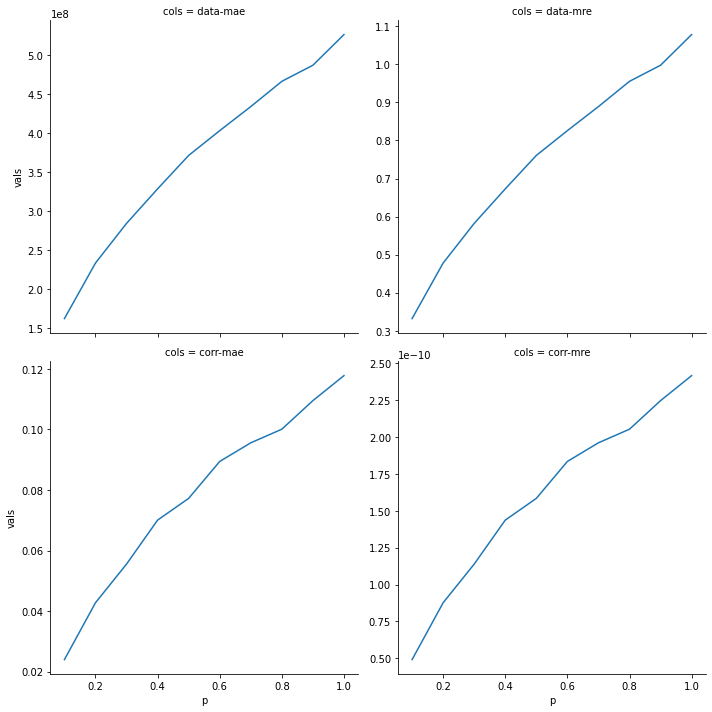

In [10]:
info_loss = []
i_l = {}
for _ in np.arange(0.1, 1.1, 0.1):
    df_noise_a = noise_add_normal(df_company, _)
    i_l['p'] = round(_, 1)
    i_l.update(information_loss(df_company, df_noise_a))
    print('Additive noise with p = {:.1f}: {}'.format(_, i_l))
    info_loss.append(i_l.copy())
plot_information_loss(info_loss)

# En este caso se genera una lista de diccionarios que contienen las medidas de pérdida de información
# tras aplicar ruido aditivo a un conjunto de datos, con diferentes valores de p en incrementos de 0.1.

En el cuestionario encontraréis 2 preguntas relacionadas con estos resultados.
El resultado obtenido (por si no habéis podido completar el ejercicio) podría
ser algo parecido a:

```
Additive noise with p=0.1:
  {'corr-mae': 0.0030944697605186115,
   'corr-mre': 0.019953736292984206,
   'data-mae': 52079729.06737299,
   'data-mre': inf}
Multiplicative noise with p=0.1:
  {'corr-mae': 0.0023950396016735476,
   'corr-mre': 0.02207930859592042,
   'data-mae': 51756980.025623895,
   'data-mre': inf}
```

**Ejercicio 5** [10%]

Para solventar el problema que tenemos en el cálculo del MRE, vamos a utilizar
otra medida de error relativo. Concretamente utilizaremos un porcentaje sobre
el error absoluto. Generalmente recibe el nombre de Symmetric Mean Absolute
Percentage Error (SMAPE) y se puede calcular de diversas maneras. En nuestro
caso utilizaremos la siguiente.

Dadas dos matrices $X$ y $X'$ como las que hemos ido trabajando en estos
ejercicios tenemos que:
- *MRE-2*: $100 \cdot \frac{\sum_{j=1}^p \sum_{i=1}^n \mid x_{ij} - x'_{ij} \mid}{\sum_{j=1}^p \sum_{i=1}^n (x_{ij} + x'_{ij})}$

Implementad una nueva función `information_loss_2` de manera análoga a la
anterior pero que utilize esta nueva medida de MRE-2 tanto para el cálculo de
`data-mre` como el de `corr-mre`.

Con esta nueva función volved a calcular la pérdida de información obtenida
al aplicar ruido aditivo y multiplicativo anterior:

- Muestra los valores de pérdida de información en cada caso para `df_noise_a`
y `df_noise_m`.

- Muestra de forma gráfica la pérdida de información al aplicar ruido aditivo
a `df_company` con valores de $p$ entre $0.1$ y $1$ con un decimal. Es decir, para
$p=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]$.

Additive noise with p=0.1: {'p': 0.1, 'data-mae': 163541828.08213347, 'data-mre': 16.793346184492737, 'corr-mae': 0.02524887791313142, 'corr-mre': 2.592689298741738e-09}
Additive noise with p=0.2: {'p': 0.2, 'data-mae': 235064897.37154654, 'data-mre': 23.967516878155482, 'corr-mae': 0.04401162720441864, 'corr-mre': 4.487481668475929e-09}
Additive noise with p=0.3: {'p': 0.3, 'data-mae': 285334772.7525794, 'data-mre': 29.16447143942909, 'corr-mae': 0.05911748312173234, 'corr-mre': 6.042481718727385e-09}
Additive noise with p=0.4: {'p': 0.4, 'data-mae': 326272932.1493053, 'data-mre': 33.426110834620935, 'corr-mae': 0.06822856731552669, 'corr-mre': 6.989901485706334e-09}
Additive noise with p=0.5: {'p': 0.5, 'data-mae': 365845997.8571866, 'data-mre': 37.38146001577377, 'corr-mae': 0.07901448014449515, 'corr-mre': 8.073551842821052e-09}
Additive noise with p=0.6: {'p': 0.6, 'data-mae': 400373141.382723, 'data-mre': 40.88316325695075, 'corr-mae': 0.08829114749856404, 'corr-mre': 9.015643219

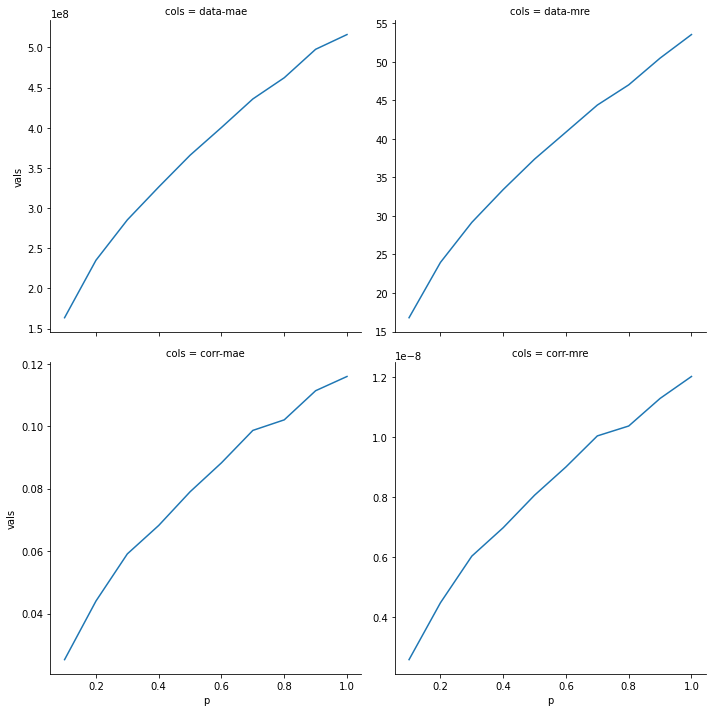

In [11]:
def information_loss_2(df_original: pd.DataFrame, df_protected: pd.DataFrame) -> Dict[str, float]:
    info_loss = {}
    info_loss['data-mae'] = (df_original - df_protected).abs().mean().mean()
    info_loss['data-mre'] = 100*((df_original - df_protected).abs().mean().sum()/(df_original + df_protected).mean().sum())
    info_loss['corr-mae'] = (df_original.corr() - df_protected.corr()).abs().mean().mean()
    info_loss['corr-mre'] = 100*((df_original.corr() - df_protected.corr()).abs().mean().sum()/(df_original + df_protected).mean().sum())
    return(info_loss)
info_loss_2 = []
i_l_2 = {}
for _ in np.arange(0.1, 1.1, 0.1):
    df_noise_a = noise_add_normal(df_company, _)
    i_l_2['p'] = round(_, 1)
    i_l_2.update(information_loss_2(df_company, df_noise_a))
    print('Additive noise with p={:.1f}: {}'.format(_, i_l_2))
    info_loss_2.append(i_l_2.copy())
plot_information_loss(info_loss_2)

# En este caso se modifica la función del cálculo de pérdida de información para que utilice el error absoluto
# en forma de porcentaje.
# El resto de la función, así como el bucle que genera la información para cada valor de p siguen la
# misma lógica que en el caso anterior.

**Ejercicio 6** [20%]

Vamos ahora a considerar posibles niveles de ruido para garantizar una pérdida
de información máxima.

El parámetro $p$ puede tomar valores a partir de $0$ y siempre se expresará
con un solo decimal. Es decir, podemos tener valores como $0.3$ o $1.2$ pero
no $0.31$ o $1.023$.

- ¿Que valores de $p$ podemos utilizar si queremos garantizar que `data-mae`
sea menor que $700000000.0$ ($7.0e+08$) con ruido aditivo?
- ¿Y con ruido multiplicativo?


In [13]:
print('Additive')
p = 0.1
i = data_mae = 0
while data_mae<7.0e+08:
    df_noise_temp = noise_add_normal(df_company, p)
    i_l_temp = information_loss_2(df_company, df_noise_temp)
    print('{}\tp:{:.1f}\t{}'.format(i, p, i_l_temp))
    p += 0.1
    i += 1
    data_mae = i_l_temp['data-mae']
    
print('\nMultiplicative')
p = 0.1
i = data_mae = 0
while data_mae<7.0e+08:
    df_noise_temp = noise_mul_normal(df_company, p)
    i_l_temp = information_loss_2(df_company, df_noise_temp)
    print('{}\tp:{:.1f}\t{}'.format(i, p, i_l_temp))
    p += 0.1
    i += 1
    data_mae = i_l_temp['data-mae']
    
# Se incluyen las iteraciones necesarias para matener un umbral determinado de pérdida de información.
# En las diferentes ejecuciones, en el caso aditivo, p se ha mantenido entre 1.7 y 1.9, mientras que para
# el caso multiplicativo nunca se puede mantener un umbral inferior al dado en el enunciado. EL primer valor
# de p ya dispara el resultado.

Additive
0	p:0.1	{'data-mae': 165082881.3250297, 'data-mre': 16.92628875206668, 'corr-mae': 0.02331172956612458, 'corr-mre': 2.390199775889717e-09}
1	p:0.2	{'data-mae': 233249644.87368757, 'data-mre': 23.947674158229727, 'corr-mae': 0.03645599676965538, 'corr-mre': 3.742926735112333e-09}
2	p:0.3	{'data-mae': 282857038.959359, 'data-mre': 29.168630118862293, 'corr-mae': 0.05533444120765204, 'corr-mre': 5.7061682267409945e-09}
3	p:0.4	{'data-mae': 326554163.19816273, 'data-mre': 33.317011040035574, 'corr-mae': 0.06517109150653906, 'corr-mre': 6.649144980879996e-09}
4	p:0.5	{'data-mae': 367552121.84503585, 'data-mre': 37.6558999360802, 'corr-mae': 0.07684356190787717, 'corr-mre': 7.872661606222443e-09}
5	p:0.6	{'data-mae': 408536939.64496195, 'data-mre': 42.113305505613496, 'corr-mae': 0.0894935242919136, 'corr-mre': 9.225281152188407e-09}
6	p:0.7	{'data-mae': 434826689.779268, 'data-mre': 44.351210952762735, 'corr-mae': 0.0945698652125728, 'corr-mre': 9.645884533781284e-09}
7	p:0.8	{'dat

*Nota*:

En el cuestionario encontraréis preguntas relacionadas con este resultado. Por
si no lo habéis podido generar un posible resultado seria:

|     p |     data-mae |   data-mre | corr-mae |  corr-mre |
| --- | --- | --- | --- | --- |
|   0.1 | 5.205909e+07 |   5.339471 | 0.002720 |  0.283282 |
|   0.2 | 1.039057e+08 |  10.671081 | 0.009523 |  1.000067 |
|   0.3 | 1.562156e+08 |  16.076136 | 0.018658 |  1.976143 |
|   0.4 | 2.057630e+08 |  21.055811 | 0.032570 |  3.505345 |
|   0.5 | 2.581114e+08 |  26.445396 | 0.048507 |  5.311586 |
|   0.6 | 3.142680e+08 |  32.599095 | 0.060780 |  6.726185 |
|   0.7 | 3.626483e+08 |  37.317642 | 0.078781 |  8.891282 |
| ... | ... | ... | ... | ... |

## Ruido correlacionado

**Ejercicio 7** [25%]

Ahora implementaremos una version del ruido aditivo pero en este caso utilizaremos
ruido correlacionado. Es decir, el ruido añadido no será independiente para cada
variable.

Para ello utilizaremos el método indicado en el módulo
*Introducción a la privacidad en la publicación de datos*
de los materiales de la asignatura, donde se genera
ruido con una distribución normal multivariable utilizando la matriz de
covarianza de los datos originales.

Implementad una función `noise_add_normal_corr` que recibe como parámetro el
DataFrame a anonimizar y el parámetro $p$ y retorna el resultado como una
nueva copia del DataFrame.

Una vez implementada, determina que valores de $p$ se pueden utilizar si
queremos que `data-mae` sea menor que $700000000.0$ ($7.0e+08$).

*Nota*: funciónes que os puede ser de utilidad:
- `numpy.random.Generator.multivariate_normal`
- `pandas.DataFrame.cov`

In [26]:
def noise_add_normal_corr(df: pd.DataFrame, p: float) -> pd.DataFrame:
    df_protected = df.copy()
    df_protected = df_protected + np.random.default_rng().multivariate_normal([0.0, 0.0, 0.0, 0.0], df_protected.cov() * p, df_protected.shape[0])
    return(df_protected)

p = 0.1
i = data_mae = 0
while data_mae<7.0e+08:
    df_noise_temp = noise_add_normal_corr(df_company, p)
    i_l_temp = information_loss_2(df_company, df_noise_temp)
    print('{}\tp:{:.1f}\t{}'.format(i, p, i_l_temp))
    p += 0.1
    i += 1
    data_mae = i_l_temp['data-mae']

# Una vez más el valor de p ha de quedar por debajo de 1.9 para matener data-mae en el umbral solicitado. 
# Podemos concluir que el error estándar de la media es "independiente" del tipo de ruido aditivo aplicado. 

<ipython-input-26-8dfc06bcddfa>:3: RuntimeWarning: covariance is not positive-semidefinite.
  df_protected = df_protected + np.random.default_rng().multivariate_normal([0.0, 0.0, 0.0, 0.0], df_protected.cov() * p, df_protected.shape[0])


0	p:0.1	{'data-mae': 165684823.50341457, 'data-mre': 17.00734027028325, 'corr-mae': 0.0013288952677078059, 'corr-mre': 1.3640944006564385e-10}
1	p:0.2	{'data-mae': 229536951.40705916, 'data-mre': 23.49294542689005, 'corr-mae': 0.001933158493155114, 'corr-mre': 1.978574112047102e-10}
2	p:0.3	{'data-mae': 284027300.1740849, 'data-mre': 29.168411082029383, 'corr-mae': 0.006037484211533203, 'corr-mre': 6.2002427680482e-10}
3	p:0.4	{'data-mae': 327561371.06868804, 'data-mre': 33.49113472617885, 'corr-mae': 0.0031656479068145147, 'corr-mre': 3.236680204288767e-10}
4	p:0.5	{'data-mae': 363816847.1429769, 'data-mre': 37.40499732431374, 'corr-mae': 0.004499467844837866, 'corr-mre': 4.626024990834321e-10}
5	p:0.6	{'data-mae': 401143000.157069, 'data-mre': 40.98561167850509, 'corr-mae': 0.005942824263146469, 'corr-mre': 6.071906712258432e-10}
6	p:0.7	{'data-mae': 432986900.21760076, 'data-mre': 44.38321894393687, 'corr-mae': 0.002824298460738981, 'corr-mre': 2.8950404015226745e-10}
7	p:0.8	{'data

*Nota*:

En el cuestionario encontraréis preguntas relacionadas con este resultado. Por
si no lo habéis podido generar un posible resultado seria:

|   p |     data-mae |  data-mre | corr-mae | corr-mre |
| --- | --- | --- | --- | --- |
|  0.1 | 1.634213e+08 | 16.765217 | 0.004466 | 0.465132 |
|  0.2 | 2.287595e+08 | 23.436578 | 0.003788 | 0.393341 |
|  0.3 | 2.829093e+08 | 29.025049 | 0.000809 | 0.084139 |
|  0.4 | 3.253294e+08 | 33.410478 | 0.004092 | 0.423678 |
|  0.5 | 3.698282e+08 | 37.843985 | 0.004538 | 0.474141 |
|  0.6 | 4.035310e+08 | 41.413029 | 0.009736 | 1.002164 |
|  0.7 | 4.323943e+08 | 44.635360 | 0.006537 | 0.684411 |
| ... | ... | ... | ... | ... |

